In [4]:
!pip3 install pandas openpyxl #판다스 데이터 프레임을 엑셀로 바꾸는 라이브러리


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip


In [1]:
import pandas as pd

In [35]:
# CSV 파일 읽기
pizza_types = pd.read_csv('./pizza_data/pizza_types.csv')
pizzas = pd.read_csv('./pizza_data/pizzas.csv')
orders = pd.read_csv('./pizza_data/orders.csv')

In [20]:
display(pizza_types.head())  # 처음 5행 출력
display(pizzas.tail())  # 마지막 5행 출력
display(orders.shape)  # 행과 열 개수 출력

,pizza_name,category,ingredients
0,바비큐 치킨 피자,치킨,"치킨, 피망, 토마토, 적양파, 바비큐 소스"
1,타이 치킨 피자,치킨,"치킨, 파인애플, 토마토, 피망, 타이 칠리 소스"
2,빅 미트 피자,클래식,"베이컨, 토마토, 페퍼로니, 살라미, 초리조"
3,클래식 디럭스 피자,클래식,"토마토, 페퍼로니, 버섯, 적양파, 피망, 베이컨"
4,슈퍼 슈프림 피자,클래식,"페퍼로니, 토마토, 적양파, 그린 올리브, 옥수수, 마늘"


,pizza_id,pizza_name,size,price
34,green_garden_m,그린 가든 피자,M,21800
35,green_garden_l,그린 가든 피자,L,33800
36,spin_pesto_s,시금치 페스토 피자,S,13800
37,spin_pesto_m,시금치 페스토 피자,M,25800
38,spin_pesto_l,시금치 페스토 피자,L,38800


(47079, 5)

In [18]:
# iloc 사용
display(pizzas.iloc[0, 0])  # 첫 번째 행, 첫 번째 열 값 조회
display(orders.iloc[0:3])  # 첫 3행 출력
display(pizzas.iloc[1:3, [1, 2]])  # 두 번째와 세 번째 행, 두 번째와 세 번째 열 값 조회

'bbq_ckn_s'

,order_id,order_timestamp,order_details_id,pizza_id,quantity
0,1,2023-01-01 11:45:11,1,hawaiian_m,1
1,2,2023-01-01 11:53:26,2,big_meat_l,1
2,2,2023-01-01 11:53:26,3,classic_dlx_m,1


,pizza_name,size
1,바비큐 치킨 피자,M
2,바비큐 치킨 피자,L


In [27]:
display(pizzas.head()) #index순서로 되어있으면 loc()쓰기가 힘들어요 \-> 

# loc를 사용하기 위해서는 index 설정이 중요하다!
pizzas2 = pizzas.set_index('size')
display(pizzas2.loc['L', ['pizza_id', 'price']])

# index 설정을 따로 하지 않았다면 이런식으로
display(pizzas.loc[pizzas['size'] == 'L'])  # 사이즈가 'L'인 행만 출력

,pizza_id,pizza_name,size,price
0,bbq_ckn_s,바비큐 치킨 피자,S,11300
1,bbq_ckn_m,바비큐 치킨 피자,M,22000
2,bbq_ckn_l,바비큐 치킨 피자,L,34000
3,thai_ckn_s,타이 치킨 피자,S,12300
4,thai_ckn_m,타이 치킨 피자,M,24000


,pizza_id,price
size,,
L,bbq_ckn_l,34000
L,thai_ckn_l,36800
L,big_meat_l,34000
L,classic_dlx_l,32300
L,hawaiian_l,33800
L,pepperoni_l,28300
L,super_supreme_l,32300
L,bulgogi_l,32300
L,prsc_rucola_l,33800


,pizza_id,pizza_name,size,price
2,bbq_ckn_l,바비큐 치킨 피자,L,34000
5,thai_ckn_l,타이 치킨 피자,L,36800
8,big_meat_l,빅 미트 피자,L,34000
11,classic_dlx_l,클래식 디럭스 피자,L,32300
14,hawaiian_l,하와이안 피자,L,33800
17,pepperoni_l,페퍼로니 피자,L,28300
20,super_supreme_l,슈퍼 슈프림 피자,L,32300
23,bulgogi_l,불고기 피자,L,32300
26,prsc_rucola_l,프로슈토 루꼴라 피자,L,33800
29,potato_l,포테이토 피자,L,33800


In [28]:
print(pizza_types.dtypes)
print(pizzas.dtypes)
print(orders.dtypes)

pizza_name     object
category       object
ingredients    object
dtype: object
pizza_id      object
pizza_name    object
size          object
price          int64
dtype: object
order_id             int64
order_timestamp     object
order_details_id     int64
pizza_id            object
quantity             int64
dtype: object


In [30]:
print(pizza_types.info()) #null값 같은 여러값을 준다
print()
print(pizza_types.describe()) #통계값을 준다

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   pizza_name   13 non-null     object
 1   category     13 non-null     object
 2   ingredients  13 non-null     object
dtypes: object(3)
memory usage: 440.0+ bytes
None

       pizza_name category               ingredients
count          13       13                        13
unique         13        4                        13
top     바비큐 치킨 피자      클래식  치킨, 피망, 토마토, 적양파, 바비큐 소스
freq            1        4                         1


In [31]:
print(pizza_types['category'].unique())  # 유니크한 value
print(pizza_types['category'].nunique()) # 유니크 value의 개수

['치킨' '클래식' '스페셜' '베지테리언']
4


In [33]:
print(pizzas['size'].value_counts()) # 수치로 출력
print()
print(pizzas['size'].value_counts(normalize=True)) # 비율로 출력

size
S    13
M    13
L    13
Name: count, dtype: int64

size
S    0.333333
M    0.333333
L    0.333333
Name: proportion, dtype: float64


In [37]:
ndf = pd.read_csv('./pizza_data/null.csv')
ndf.head()

,A,B,C
0,5.0,0.0,376.0
1,3.0,0.0,94.0
2,3.0,91.0,141.0
3,NaN,78.0,NaN
4,2.0,104.0,376.0


In [38]:
ndf.isnull().sum()

A    5
B    6
C    4
dtype: int64

In [39]:
ndf.dropna()

# B, C 열의 결측치만 제거
ndf.dropna(subset=['B', 'C'])

,A,B,C
0,5.0,0.0,376.0
1,3.0,0.0,94.0
2,3.0,91.0,141.0
4,2.0,104.0,376.0
5,3.0,0.0,329.0
6,5.0,13.0,376.0
8,8.0,91.0,141.0
9,2.0,52.0,235.0
10,3.0,13.0,282.0
11,0.0,52.0,376.0


In [42]:
ndf.fillna(999)

# 컬럼별로 다르게 채우기
ndf.fillna( value={'A': 111, 'B': 222, 'C': 333})

,A,B,C
0,5.0,0.0,376.0
1,3.0,0.0,94.0
2,3.0,91.0,141.0
3,111.0,78.0,333.0
4,2.0,104.0,376.0
5,3.0,0.0,329.0
6,5.0,13.0,376.0
7,5.0,222.0,235.0
8,8.0,91.0,141.0
9,2.0,52.0,235.0


In [48]:
# 모든 컬럼에 대해 중복 확인
ndf.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29     True
30    False
31    False
32    False
33     True
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41     True
42    False
43     True
44    False
45    False
46    False
47    False
48    False
49    False
dtype: bool

In [46]:
# 중복 행 확인
ndf[ndf.duplicated(keep=False)]

,A,B,C
12,3.0,NaN,329.0
20,3.0,13.0,329.0
23,5.0,0.0,94.0
27,0.0,0.0,329.0
29,3.0,NaN,329.0
33,0.0,0.0,329.0
41,5.0,0.0,94.0
43,3.0,13.0,329.0


In [59]:
# '_'를 기준으로 문자열 분리 [리스트로 받음]
pizzas['pizza_id'].str.split('_')

0           [bbq, ckn, s]
1           [bbq, ckn, m]
2           [bbq, ckn, l]
3          [thai, ckn, s]
4          [thai, ckn, m]
5          [thai, ckn, l]
6          [big, meat, s]
7          [big, meat, m]
8          [big, meat, l]
9       [classic, dlx, s]
10      [classic, dlx, m]
11      [classic, dlx, l]
12          [hawaiian, s]
13          [hawaiian, m]
14          [hawaiian, l]
15         [pepperoni, s]
16         [pepperoni, m]
17         [pepperoni, l]
18    [super, supreme, s]
19    [super, supreme, m]
20    [super, supreme, l]
21           [bulgogi, s]
22           [bulgogi, m]
23           [bulgogi, l]
24      [prsc, rucola, s]
25      [prsc, rucola, m]
26      [prsc, rucola, l]
27            [potato, s]
28            [potato, m]
29            [potato, l]
30      [five, cheese, s]
31      [five, cheese, m]
32      [five, cheese, l]
33     [green, garden, s]
34     [green, garden, m]
35     [green, garden, l]
36       [spin, pesto, s]
37       [spin, pesto, m]
38       [sp

In [65]:
print(orders.dtypes) #timestamp가 object면 datetime으로 바꿔야지 메모리가 적어짐
print()
orders['order_timestamp'] = pd.to_datetime(orders['order_timestamp'])

print(orders.dtypes)

order_id                     int64
order_timestamp     datetime64[ns]
order_details_id             int64
pizza_id                    object
quantity                     int64
dtype: object

order_id                     int64
order_timestamp     datetime64[ns]
order_details_id             int64
pizza_id                    object
quantity                     int64
dtype: object


In [68]:
orders['order_date'] = orders['order_timestamp'].dt.date # 날짜(yyyy-mm-dd) 추출
orders['order_year'] = orders['order_timestamp'].dt.year # 년 추출
orders['order_month'] = orders['order_timestamp'].dt.month # 월 추출
orders['order_day'] = orders['order_timestamp'].dt.day # 일 추출
orders['order_hour'] = orders['order_timestamp'].dt.hour # 시간 추출
orders.head()

,order_id,order_timestamp,order_details_id,pizza_id,quantity,order_date,order_year,order_month,order_day,order_hour
0,1,2023-01-01 11:45:11,1,hawaiian_m,1,2023-01-01,2023,1,1,11
1,2,2023-01-01 11:53:26,2,big_meat_l,1,2023-01-01,2023,1,1,11
2,2,2023-01-01 11:53:26,3,classic_dlx_m,1,2023-01-01,2023,1,1,11
3,2,2023-01-01 11:53:26,4,five_cheese_l,1,2023-01-01,2023,1,1,11
4,2,2023-01-01 11:53:26,5,potato_m,1,2023-01-01,2023,1,1,11


In [70]:
# 주문 ID 별 수량 합계
orders.groupby('order_id')['quantity'].sum()

# 여러 집계값들 생성 - 보통 이걸 씀
orders.groupby('pizza_id').agg(total_quantity=('quantity', 'sum'),  # 총 수량
    order_count=('order_id', 'nunique'))  # 고유 주문 건수

,total_quantity,order_count
pizza_id,,
bbq_ckn_l,1674,1591
bbq_ckn_m,1528,1453
bbq_ckn_s,863,825
big_meat_l,905,858
big_meat_m,769,738
big_meat_s,2471,2309
bulgogi_l,860,810
bulgogi_m,691,664
bulgogi_s,564,547


In [71]:
# ','를 기준으로 문자열을 분리하는 함수 적용
def split_str(value):
    value = value.split(',')
    return value
    
pizza_types['ingredients'].apply(split_str)

0                        [치킨,  피망,  토마토,  적양파,  바비큐 소스]
1                     [치킨,  파인애플,  토마토,  피망,  타이 칠리 소스]
2                        [베이컨,  토마토,  페퍼로니,  살라미,  초리조]
3                    [토마토,  페퍼로니,  버섯,  적양파,  피망,  베이컨]
4                [페퍼로니,  토마토,  적양파,  그린 올리브,  옥수수,  마늘]
5                                [토마토,  모짜렐라 치즈,  페퍼로니]
6          [모짜렐라 치즈,  토마토,  감자,  양파,  베이컨,  옥수수,  마요네즈]
7                          [토마토,  베이컨,  파인애플,  모짜렐라 치즈]
8               [불고기,  불고기 소스,  버섯,  양파,  피망,  모짜렐라 치즈]
9                                [프로슈토,  루꼴라,  모짜렐라 치즈]
10    [모짜렐라 치즈,  프로볼로네 치즈,  고다 치즈,  페코리노 치즈,  고르곤졸라 치즈]
11           [가지,  아티초크,  토마토,  쥬키니,  피망,  마늘,  페스토 소스]
12          [시금치,  아티초크,  토마토,  썬드라이 토마토,  마늘,  페스토 소스]
Name: ingredients, dtype: object

In [72]:
orders.merge(pizzas, left_on='pizza_id', right_on='pizza_id', how='left')

,order_id,order_timestamp,order_details_id,pizza_id,quantity,order_date,order_year,order_month,order_day,order_hour,pizza_name,size,price
0,1,2023-01-01 11:45:11,1,hawaiian_m,1,2023-01-01,2023,1,1,11,하와이안 피자,M,21800
1,2,2023-01-01 11:53:26,2,big_meat_l,1,2023-01-01,2023,1,1,11,빅 미트 피자,L,34000
2,2,2023-01-01 11:53:26,3,classic_dlx_m,1,2023-01-01,2023,1,1,11,클래식 디럭스 피자,M,20300
3,2,2023-01-01 11:53:26,4,five_cheese_l,1,2023-01-01,2023,1,1,11,파이브 치즈 피자,L,31000
4,2,2023-01-01 11:53:26,5,potato_m,1,2023-01-01,2023,1,1,11,포테이토 피자,M,21800
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47074,21348,2023-12-31 20:37:13,47075,bulgogi_m,1,2023-12-31,2023,12,31,20,불고기 피자,M,20300
47075,21348,2023-12-31 20:37:13,47076,potato_l,1,2023-12-31,2023,12,31,20,포테이토 피자,L,33800
47076,21348,2023-12-31 20:37:13,47077,super_supreme_s,1,2023-12-31,2023,12,31,20,슈퍼 슈프림 피자,S,10800
47077,21349,2023-12-31 21:02:45,47078,bulgogi_l,1,2023-12-31,2023,12,31,21,불고기 피자,L,32300


In [73]:
orders.resample(
    rule='H',
    on='order_timestamp',
    )['quantity'].sum()

/var/folders/l2/03304mg17zzdfl01b3nwlqrr0000gn/T/ipykernel_4061/3535691147.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  orders.resample(


order_timestamp
2023-01-01 11:00:00     8
2023-01-01 12:00:00    25
2023-01-01 13:00:00     6
2023-01-01 14:00:00    14
2023-01-01 15:00:00     3
                       ..
2023-12-31 17:00:00     6
2023-12-31 18:00:00     0
2023-12-31 19:00:00    14
2023-12-31 20:00:00    11
2023-12-31 21:00:00     2
Freq: h, Name: quantity, Length: 8747, dtype: int64

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

## 맥북일 경우만 아래 두 줄 적용!
from matplotlib import rc
rc('font', family='AppleGothic') 

In [75]:
df = orders.merge(pizzas, on='pizza_id', how='left')

sum(df['price']*df['quantity'])

1140882200

In [76]:
# timestamp에서 month 추출
orders['order_month'] = orders['order_timestamp'].dt.month

# 데이터프레임 Join
df = orders.merge(pizzas, on='pizza_id', how='left')

# group by 집계를 통해 월별 매출 계산
monthly_sales_df = df.groupby('order_month').agg(
    monthly_price = ('price', 'sum')
    ).reset_index()

monthly_sales_df

,order_month,monthly_price
0,1,88403200
1,2,84750100
2,3,93481700
3,4,90563700
4,5,94909200
5,6,90760900
6,7,95929400
7,8,90563700
8,9,84626700
9,10,83337000


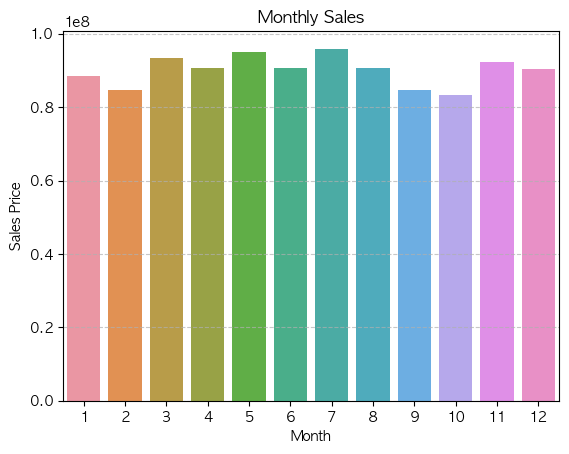

In [77]:
sns.barplot(
    data=monthly_sales_df,
    x='order_month',
    y='monthly_price',
).set(
    title='Monthly Sales',
    xlabel='Month',
    ylabel='Sales Price'
)
plt.grid(axis='y', linestyle='--', alpha=0.7)